# KNN Notebook
## Abstract
Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter. Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted,which treat the candidate data sets as binary classification problems.
## Purpose
This note book is aim to analyze the Pulsars dataset and latter employ different ML technique to effectively classify stars into pulsar and non-pulsar classes

## Import Library and preprocess the data

In [7]:
import pandas as pd
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
pulsars = pd.read_csv('/Users/mac/Downloads/HTRU_2.csv')
pulsars.columns=['Mean of IP','sd of IP','Excess kurtosis of IP'
                ,'Skewness of IP','Mean of  DM-SNR ',
                'sd of DM-SNR ','Excess kurtosis of  DM-SNR '
                ,'Skewness of DM-SNR ','Class HTRU ']


## Visualize the data

In [8]:
pulsars.head()

,Mean of IP,sd of IP,Excess kurtosis of IP,Skewness of IP,Mean of DM-SNR,sd of DM-SNR,Excess kurtosis of DM-SNR,Skewness of DM-SNR,Class HTRU
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0


In [ ]:
pulsars.describe()

In [ ]:
pulsars.info()

We will visualize the distribution of each feature by histogram

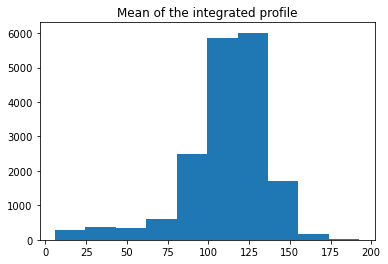

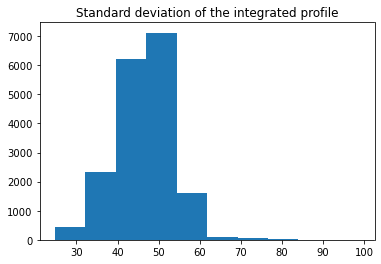

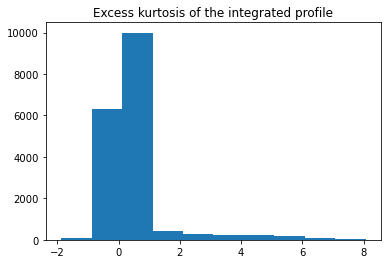

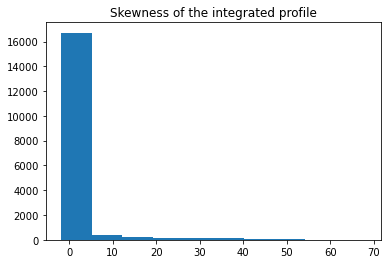

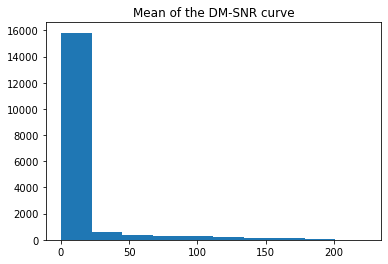

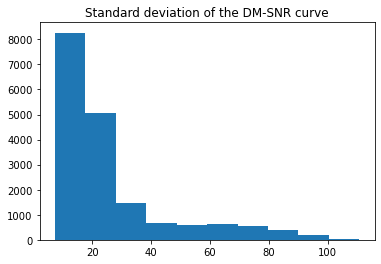

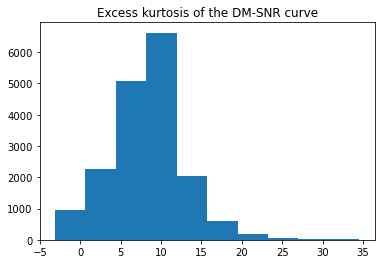

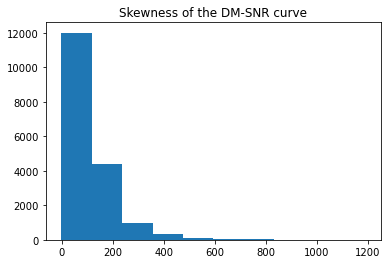

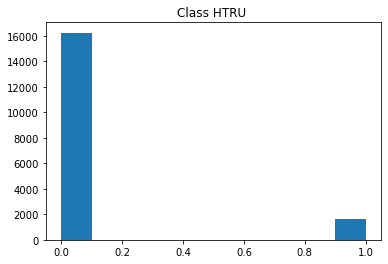

In [13]:
for i in pulsars.columns:
    plt.hist(pulsars[i])
    plt.title(i)
    plt.show()



## KNN 
$ \sqrt{k} +  \hat{Y} = \hat{\beta}_{0} + \sum \limits _{j=1} ^{p} X_{j}\hat{\beta}_{j}  $




                             Mean of IP  sd of IP  Excess kurtosis of IP  \
Mean of IP                     1.000000  0.547099              -0.873899   
sd of IP                       0.547099  1.000000              -0.521418   
Excess kurtosis of IP         -0.873899 -0.521418               1.000000   
Skewness of IP                -0.738780 -0.539792               0.945730   
Mean of  DM-SNR               -0.298832  0.006893               0.414362   
sd of DM-SNR                  -0.307005 -0.047606               0.432873   
Excess kurtosis of  DM-SNR     0.234345  0.029436              -0.341216   
Skewness of DM-SNR             0.144057  0.027714              -0.214505   
Class HTRU                    -0.673187 -0.363704               0.791592   

                             Skewness of IP  Mean of  DM-SNR   sd of DM-SNR   \
Mean of IP                        -0.738780         -0.298832      -0.307005   
sd of IP                          -0.539792          0.006893      -0.047606   

<AxesSubplot:>

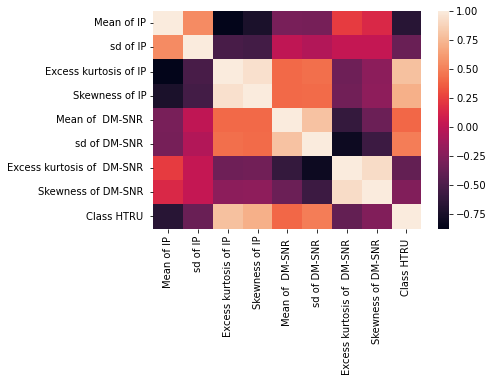

In [15]:
df_num=pulsars[['Mean of IP','sd of IP','Excess kurtosis of IP'
                ,'Skewness of IP','Mean of  DM-SNR ',
                'sd of DM-SNR ','Excess kurtosis of  DM-SNR '
                ,'Skewness of DM-SNR ','Class HTRU ']]
print(df_num.corr())
sns.heatmap(df_num.corr())

In [20]:
l=list(pulsars.columns)
l[0:len(l)-2]
print (l[len(l)-1])

Class HTRU 


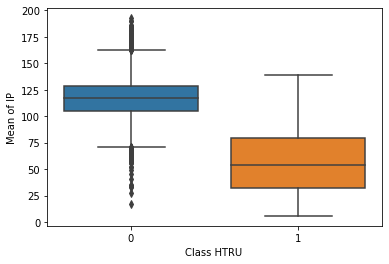

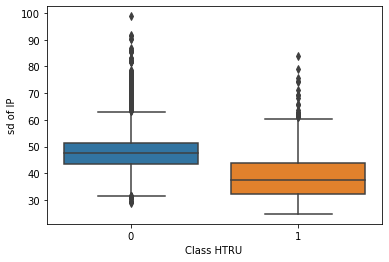

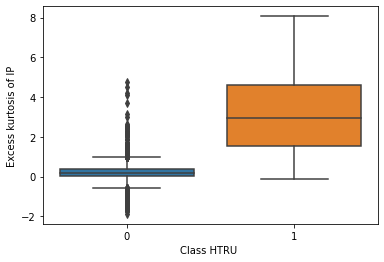

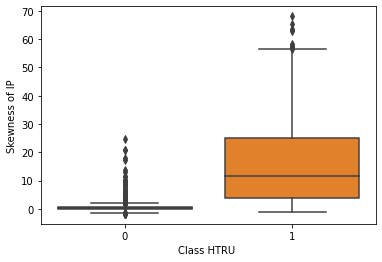

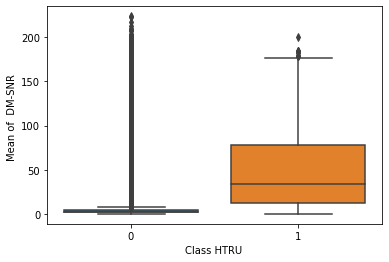

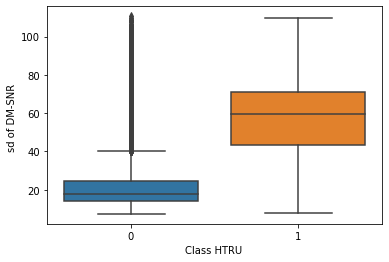

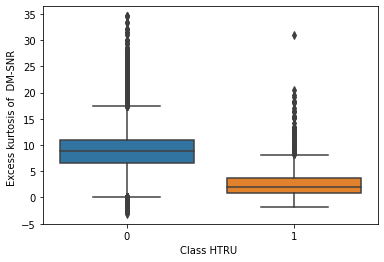

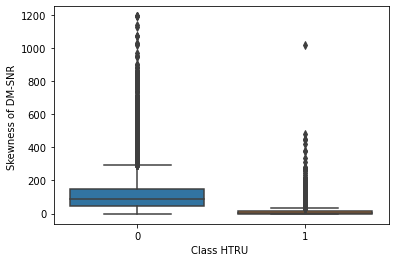

<Figure size 432x288 with 0 Axes>

In [19]:
for i in range(len(l)-1):
    sns.boxplot(x='Class HTRU ',y=l[i], data=pulsars)
    plt.figure()

In [35]:
from sklearn.preprocessing import StandardScaler
import numpy as np
# print(pulsars.info())
# why need to scale?
scaler = StandardScaler()
scaler.fit(pulsars.drop('Class HTRU ',axis=1))
scaled_features = scaler.transform(pulsars.drop('Class HTRU ',axis=1))

In [28]:
df_feat = pd.DataFrame(scaled_features,columns=pulsars.columns[:-1])
df_feat.head()

,Mean of IP,sd of IP,Excess kurtosis of IP,Skewness of IP,Mean of DM-SNR,sd of DM-SNR,Excess kurtosis of DM-SNR,Skewness of DM-SNR
0,-0.334107,1.802379,-0.011822,-0.370549,-0.371110,-0.588931,0.504409,0.211560
1,-0.314311,-1.053271,-0.145268,-0.116613,-0.322117,-0.235343,-0.125997,-0.391379
2,1.000768,1.553363,-0.513438,-0.390191,-0.304414,-0.275681,-0.312261,-0.481304
3,-0.871346,-0.858823,0.115570,-0.104886,-0.388018,-0.763113,1.323985,1.386742
4,-0.682521,0.021788,0.050758,-0.219475,-0.372501,-0.605113,0.514453,0.249118


In [29]:
from sklearn.model_selection import train_test_split
X = df_feat
y = pulsars['Class HTRU ']
X_train, X_test, y_train, y_test = train_test_split(scaled_features,pulsars['Class HTRU '],
                                                    test_size=0.50, random_state=1)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [31]:
pred = knn.predict(X_test)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix
conf_mat=confusion_matrix(y_test,pred)
# what is conf_mat?
print(conf_mat)
print(classification_report(y_test,pred))


[[8008  116]
 [ 150  675]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      8124
           1       0.85      0.82      0.84       825

    accuracy                           0.97      8949
   macro avg       0.92      0.90      0.91      8949
weighted avg       0.97      0.97      0.97      8949



In [36]:
print("Misclassification error rate:",round(np.mean(pred!=y_test),3))

Misclassification error rate: 0.03


In [41]:
error_rate = []

# Will take some time
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Error (misclassification) Rate')

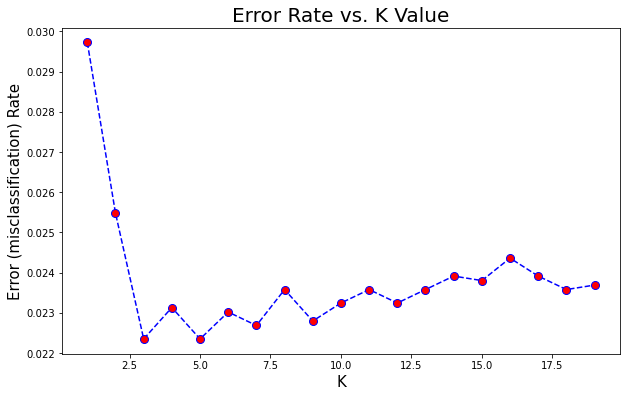

In [47]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value', fontsize=20)
plt.xlabel('K',fontsize=15)
plt.ylabel('Error (misclassification) Rate',fontsize=15)